In [24]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from preprocessing import load_and_preprocess_data
from plot import plot_decision_boundary_with_pca
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# **Preprocessing**

In [26]:
pipeline, X_train, y_train, X_test, y_test = load_and_preprocess_data(r'C:\Users\HP\Desktop\ML Project\datasets\heart.csv')

# **Logistic Regression**

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

In [30]:
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=0),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [31]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [32]:
lr_model = grid_search.best_estimator_

In [33]:
print("Best Parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation accuracy: 0.8787531450936539


In [34]:
y_pred = lr_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[57 20]
 [10 97]]


0.8369565217391305

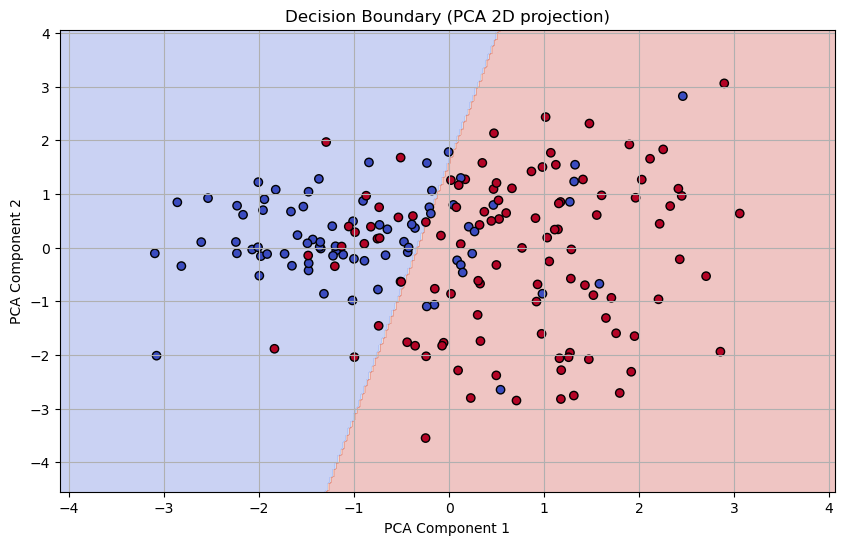

In [35]:
plot_decision_boundary_with_pca(lr_model, pipeline, X_test, y_test)

# **K-Nearest Neighbour**

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
param_grid = {
    'n_neighbors': [3, 5, 7, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [39]:
grid_search = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1
)

In [40]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 11, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [41]:
knn_model = grid_search.best_estimator_

In [42]:
print("Best Parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Best cross-validation accuracy: 0.8760320566582797


In [43]:
y_pred = knn_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[59 18]
 [11 96]]


0.842391304347826

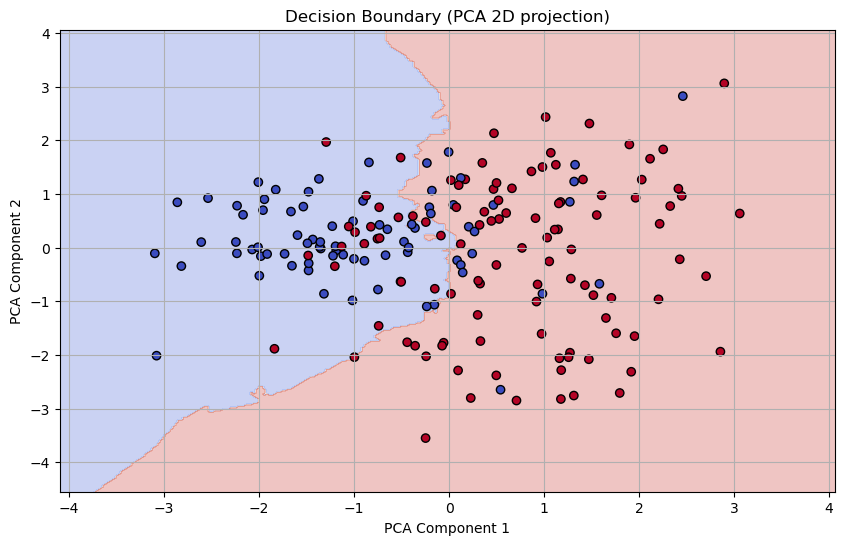

In [44]:
plot_decision_boundary_with_pca(knn_model, pipeline, X_test, y_test)

# **Support Vector Machines**

In [46]:
from sklearn.svm import SVC

In [47]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [48]:
grid_search = GridSearchCV(
    estimator = SVC(random_state = 0),
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1
)

In [49]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [50]:
svc_model = grid_search.best_estimator_

In [51]:
print("Best Parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy: 0.8773832820799552


In [52]:
y_pred = svc_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[60 17]
 [11 96]]


0.8478260869565217

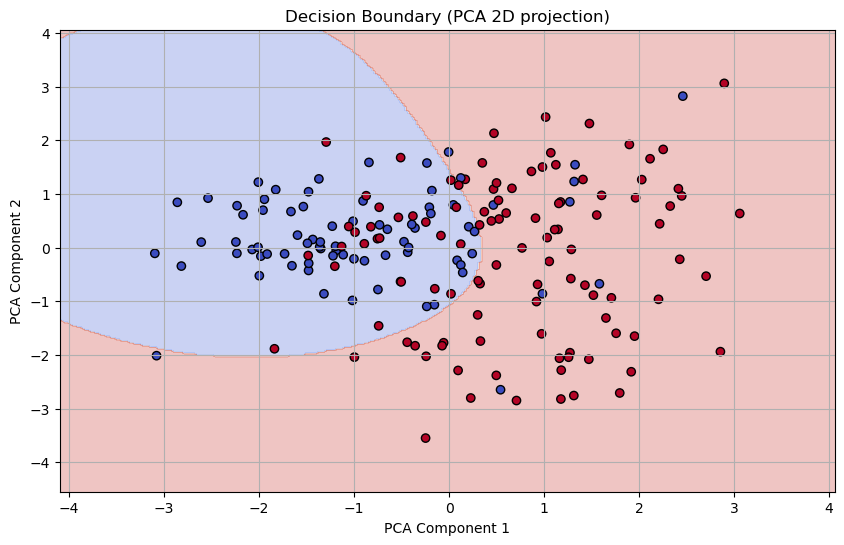

In [53]:
plot_decision_boundary_with_pca(svc_model, pipeline, X_test, y_test)

# **Naive Bayes**

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
param_grid = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-5, 1e-4]
}

In [57]:
grid_search = GridSearchCV(
    estimator = GaussianNB(),
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1
)

In [58]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001]},
             scoring='accuracy')

In [59]:
nb_model = grid_search.best_estimator_

In [60]:
print("Best Parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best Parameters: {'var_smoothing': 1e-09}
Best cross-validation accuracy: 0.8760134190662565


In [61]:
y_pred = nb_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[60 17]
 [13 94]]


0.8369565217391305

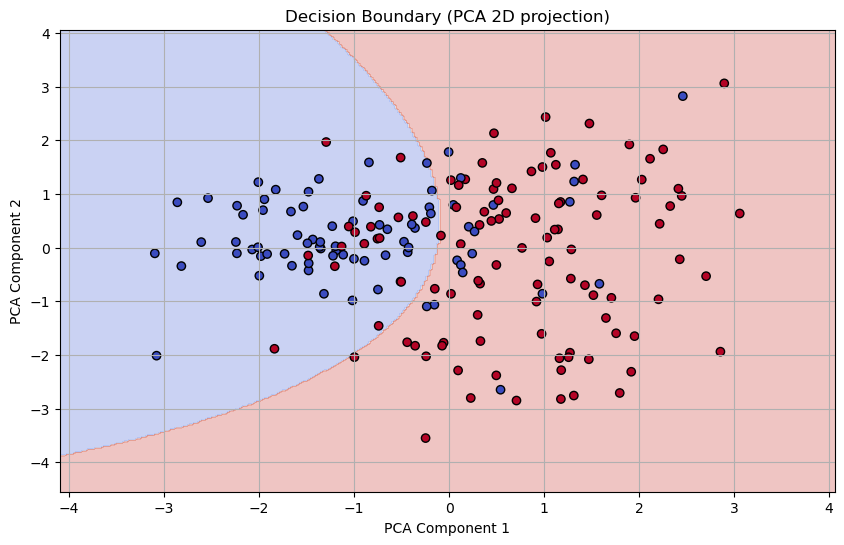

In [62]:
plot_decision_boundary_with_pca(nb_model, pipeline, X_test, y_test)

# **Decision Trees**

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [66]:
grid_search = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state = 0),
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1
)

In [67]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [68]:
dt_model = grid_search.best_estimator_

In [69]:
print("Best Parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy: 0.8392041748206133


In [70]:
y_pred = dt_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[63 14]
 [20 87]]


0.8152173913043478

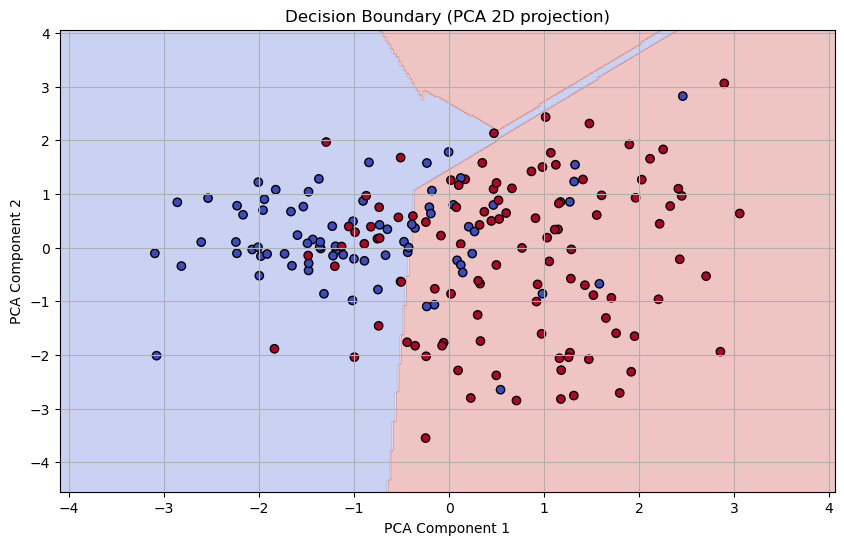

In [71]:
plot_decision_boundary_with_pca(dt_model, pipeline, X_test, y_test)

# **Random Forest**

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [75]:
grid_search = GridSearchCV(
    estimator = RandomForestClassifier(random_state = 0),
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1
)

In [76]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [77]:
rf_model = grid_search.best_estimator_

In [78]:
print("Best Parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation accuracy: 0.880113689311341


In [79]:
y_pred = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[60 17]
 [10 97]]


0.8532608695652174

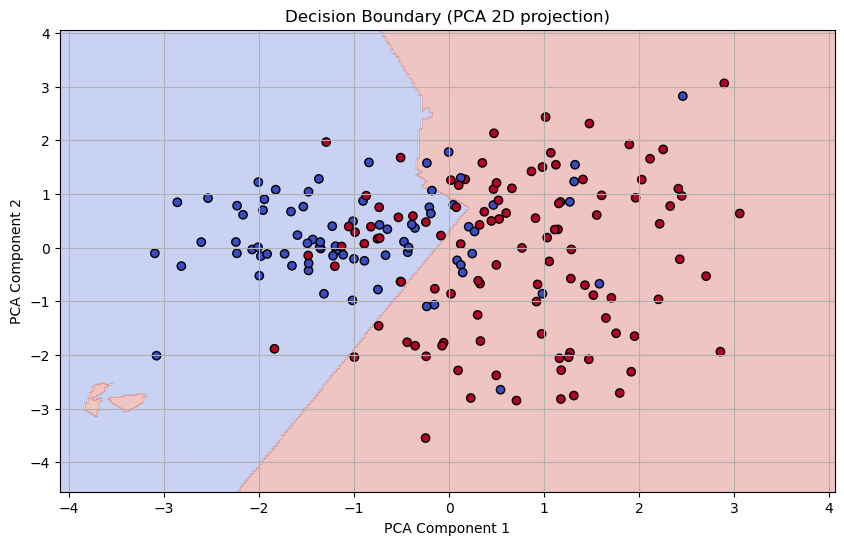

In [80]:
plot_decision_boundary_with_pca(rf_model, pipeline, X_test, y_test)

# **Gradient Boosting**

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [84]:
grid_search = GridSearchCV(
    estimator = GradientBoostingClassifier(random_state = 0),
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1
)

In [85]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy')

In [86]:
gb_model = grid_search.best_estimator_

In [87]:
print("Best Parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.7}
Best cross-validation accuracy: 0.8868884540117417


In [88]:
y_pred = gb_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[63 14]
 [10 97]]


0.8695652173913043

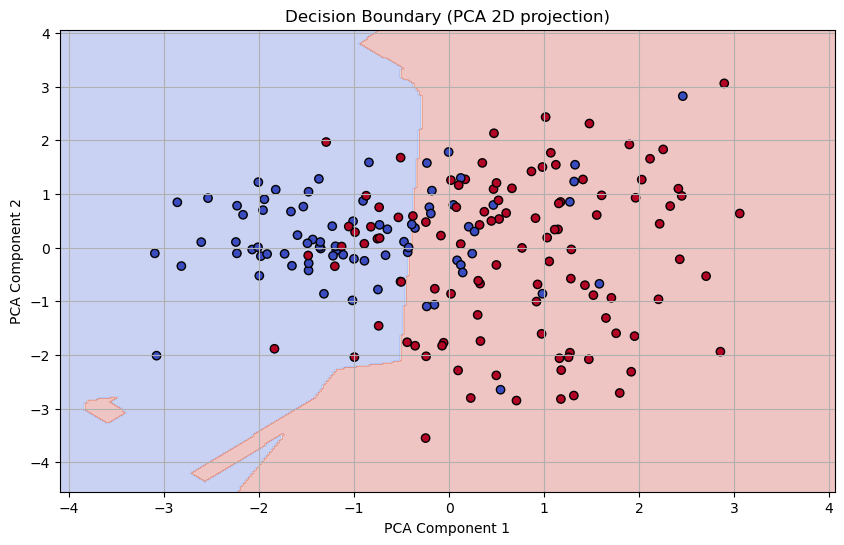

In [89]:
plot_decision_boundary_with_pca(gb_model, pipeline, X_test, y_test)

# **Save Trained Models**

In [91]:
import pickle

with open(r"C:\Users\HP\Desktop\ML Project\models.pkl", 'wb') as file:
    pickle.dump(gb_model, file)

with open(r'C:\Users\HP\Desktop\ML Project\pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)